# Python Multithreading vs Multiprocessing vs AsyncIO

Python offers many different mechanisms to write concurrent code, but which is best?

To compare, we take a toy web crawler, make it concurrent by applying multithreading, multi-processing and asyncio coroutines, and compare performance.

Our baseline is the following non-concurrent, recursive implementation:


```python
def crawl(root: str) -> None:
    seen: set[str] = set()
    with requests.Session() as session:
        def crawl(url: str) -> None:
            print(f'processing {url}')
            html = session.get(url).content
            soup = BeautifulSoup(html, 'html.parser')
            paths = {urljoin(url, a.get('href')) for a in soup.find_all('a')}
            for u in filter(lambda p: p.startswith(root) and p.endswith('/'), paths - seen):
                seen.add(u)
                crawl(u)

        crawl(root)
```

<Axes: title={'center': 'Python web crawler concurrency benchmark'}, xlabel='concurrency', ylabel='pages/sec'>

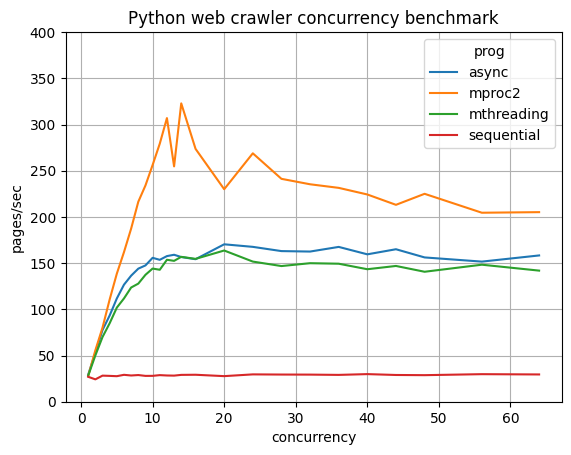

In [79]:
import pandas as pd

df = pd.read_csv('results.csv')
df = df.sort_values(by=['prog'])
df['speed'] = df['urls'] / df['time']
df = df.sort_values(by=['prog', 'concurrency'])

df = df.groupby(['concurrency', 'prog'])[['speed']].mean()
df = df.reset_index()
df = df.set_index('concurrency')
df = df.pivot_table('speed', ['concurrency'], 'prog')

df.plot(grid=True, ylim=(0, 400), title='Python web crawler concurrency benchmark', ylabel='pages/sec')

In [80]:
display(df)

prog,async,mproc2,mthreading,sequential
concurrency,,,,
1,29.280478,27.773330,28.223431,26.961729
2,53.033947,55.634004,50.094758,24.213200
3,77.579899,80.174453,70.017338,28.228156
4,93.356384,110.690390,84.949183,27.962072
5,111.746647,138.603581,101.843258,27.635283
6,126.668796,161.929175,111.802129,29.118793
7,136.414008,187.366578,123.605851,28.387010
8,144.024422,216.427720,127.816542,28.866151
9,147.518772,234.062948,137.349193,27.956782
